[IPython Notebook](eclipse.ipynb) |  [Python Script](eclipse.py)

Eclipse Detection
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:782: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Let's just compute the mesh at a single time-point that we know should be during egress.

In [3]:
b.add_dataset('mesh', times=[0.05])

<ParameterSet: 2 parameters | contexts: compute, dataset>

Native
-------------------

The 'native' eclipse method computes what percentage (by area) of each triangle is visible at the current time.  It also determines the centroid of the visible portion of each triangle.

Physical quantities (temperatures, intensities, velocities, etc) are computed at the vertices of each triangle, and this centroid is then used to determine the average quantity across the visible portion of the triangle (by assuming a linear gradient across the triangle).

Let's plot the visibilities (ratio of the area that is visible) as the color scale, with red being completely hidden and green being completely visible.  We'll also plot the centroids themselves.  Here we can see that the centroids for green/visible triangles are exactly in the center, whereas for partially visible triangles the centroid is leaning towards the visible portion of the star.

In [4]:
b.run_compute(eclipse_method='native')

<ParameterSet: 62 parameters | components: primary, secondary>

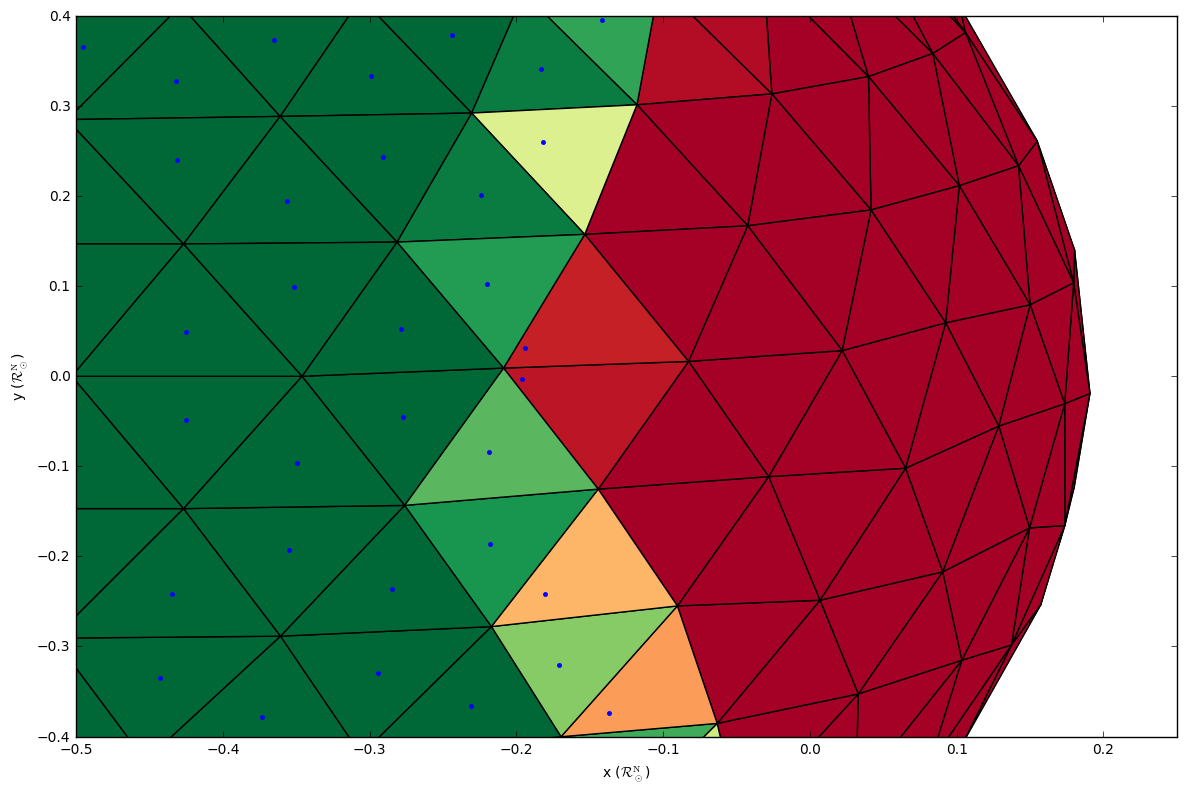

In [5]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
axs, artists = b.plot(component='primary', facecolor='visibilities', ax=ax)

wcs = b['visible_centroids@primary'].get_value()

ax.plot(wcs[:,0], wcs[:,1], 'b.')
xlim = ax.set_xlim(-0.5,0.25)
ylim = ax.set_ylim(-0.4,0.4)

In [6]:
b.run_compute(eclipse_method='visible_partial')

Fri, 10 Feb 2017 17:05 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 62 parameters | components: primary, secondary>

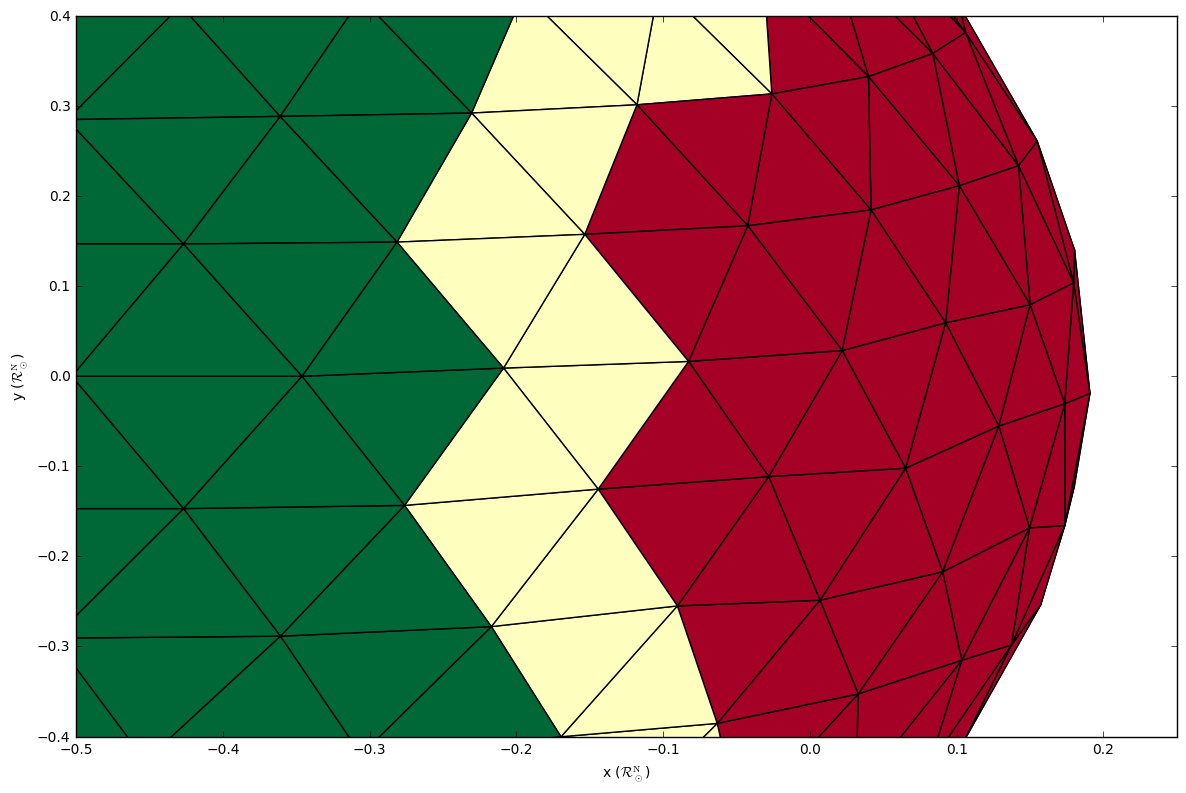

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
axs, artists = b.plot(component='primary', facecolor='visibilities', ax=ax)

xlim = ax.set_xlim(-0.5,0.25)
ylim = ax.set_ylim(-0.4,0.4)